In [5]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 15.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [6]:
import finterstellar as fs

In [ ]:
# 5.2

In [ ]:
df = fs.fn_single(otp='OTP', symbol='COST', window='T')
print(df.tail(3))

                      Revenue               COGS      Gross Profit  \
2021-02-28 178,626,000,000.00 155,078,000,000.00 23,548,000,000.00   
2021-04-30 186,637,000,000.00 162,288,000,000.00 24,349,000,000.00   
2021-05-31 178,531,000,000.00 155,366,000,000.00 23,165,000,000.00   

                        SG&A  Operating Income       Net Income   EPS  \
2021-02-28 16,559,000,000.00  5,878,000,000.00 4,344,000,000.00  9.78   
2021-04-30 17,119,000,000.00  4,699,000,000.00 4,726,000,000.00 10.64   
2021-05-31 16,503,000,000.00  4,433,000,000.00 4,557,000,000.00 10.26   

                     EBITDA             EBIT         Shares  ...  \
2021-02-28 8,898,000,000.00 5,878,000,000.00 443,000,000.00  ...   
2021-04-30 9,224,000,000.00 4,699,000,000.00 443,000,000.00  ...   
2021-05-31 8,465,000,000.00 4,433,000,000.00 443,043,000.00  ...   

            Long Term Liabilities  Total Liabilities  Shareholders Equity  \
2021-02-28      12,225,000,000.00  38,789,000,000.00    15,652,000,000.00   

In [ ]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

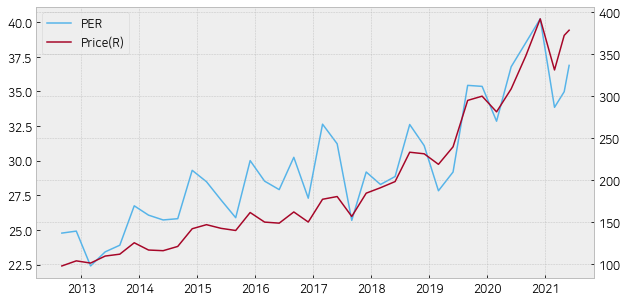

In [ ]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

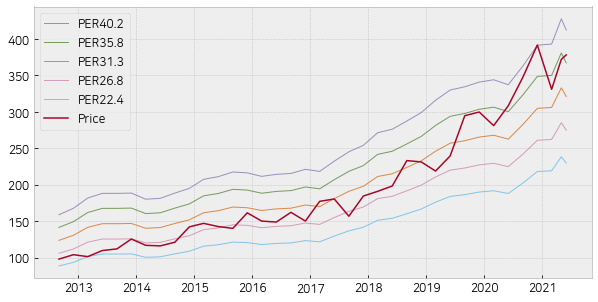

In [ ]:
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

In [ ]:
df = fs.fn_consolidated(otp='OTP', term='2020Q3', vol=100000, study='Y')
print(df.head(3))

2020Q3... For Study. Freezed at the end of July 2021. OK
          term  Revenue     COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                      
A       2020Q3 5,223.00 2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3 9,330.00 8,043.00      1,287.00   213.00            -23.00   
AAIC    2020Q3    64.77     0.00         64.77    12.56             11.16   

        Net Income   EPS   EBITDA   EBIT  ...  Financing Cash Flow  Price  \
symbol                                    ...                               
A           691.00  2.26 1,105.00 797.00  ...                49.00 100.94   
AA         -469.00 -2.53   643.00 -23.00  ...               484.00  11.63   
AAIC        -54.80 -1.52    62.76  52.21  ...            -3,220.76   2.84   

        Price_M1  Price_M2  Price_M3                                     name  \
symbol                                                                          
A        

In [ ]:
df.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')

In [ ]:
df['PER'] = df['Price'] / df['EPS']
df['PER']

symbol
A       44.66
AA      -4.60
AAIC    -1.87
AAL     -0.89
AAOI    -2.88
        ...  
ZUMZ    11.40
ZUO    -14.99
ZVO     -7.55
ZYME   -10.02
ZYXI    56.29
Name: PER, Length: 3106, dtype: float64

In [ ]:
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')   # trade term to fiscal terms
terms

Index(['2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], dtype='object')

In [ ]:
data_2019Q4 = fs.fn_consolidated(otp='OTP', term='2019Q4')
data_2020Q1 = fs.fn_consolidated(otp='OTP', term='2020Q1')
data_2020Q2 = fs.fn_consolidated(otp='OTP', term='2020Q2')
data_2020Q3 = fs.fn_consolidated(otp='OTP', term='2020Q3')
data_2020Q4 = fs.fn_consolidated(otp='OTP', term='2020Q4')

In [ ]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
print(data['2020Q3'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q3  5,223.00  2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3  9,330.00  8,043.00      1,287.00   213.00            -23.00   
AAIC    2020Q3     64.77      0.00         64.77    12.56             11.16   
AAL     2020Q3 24,623.00 27,542.00     -2,919.00   919.00         -7,177.00   
AAOI    2020Q3    230.96    180.35         50.60    55.17            -47.73   
...        ...       ...       ...           ...      ...               ...   
ZUMZ    2020Q3    980.94    643.45        337.49   259.06             78.43   
ZUO     2020Q3    291.10    133.82        157.28   164.34            -82.66   
ZVO     2020Q3    400.26     52.45        347.81    90.39            -25.78   
ZYME    2020Q3     25.15    175.65       -150.50    73.18           -223.68   
ZYXI    2020Q3     68.68     14.58         54.10    

In [ ]:
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']

In [ ]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
signal['2019Q4']

['DAC',
 'FENG',
 'SWN',
 'PAM',
 'CRON',
 'KODK',
 'NRG',
 'FINV',
 'QD',
 'REGI',
 'BPT',
 'YRD',
 'STLA',
 'LGND',
 'XIN',
 'SND',
 'STAR',
 'LXRX',
 'BBAR',
 'ARLP',
 'CNF',
 'HCC',
 'HSC',
 'PBI',
 'MUR',
 'QFIN',
 'CEPU',
 'VNO',
 'ATH',
 'TA']

In [ ]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 67.40%
Accumulated return: 67.40%
Investment period: 1.0yrs
Sharpe ratio: 1.52
MDD: -12.03%


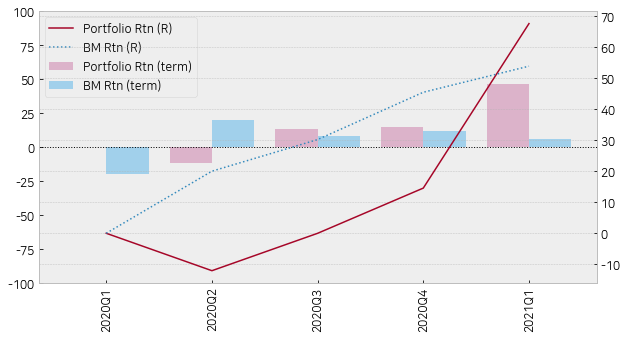

In [ ]:
fs.draw_return(df)

In [ ]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 67.40%
Accumulated return: 67.40%
Investment period: 1.0yrs
Sharpe ratio: 1.52
MDD: -12.03%


In [ ]:
# 5.3 PBR

In [ ]:
# import finterstellar as fs

In [ ]:
df = fs.fn_single(otp='OTP', symbol='JBLU', window='T')

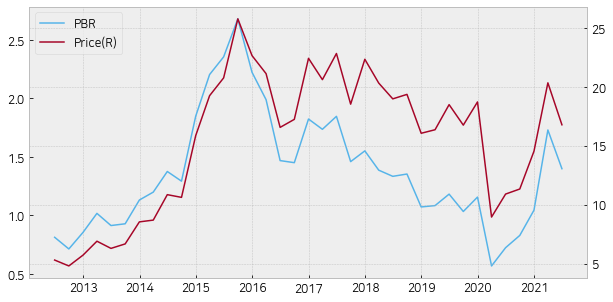

In [ ]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['PBR'] = df['Price'] / df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

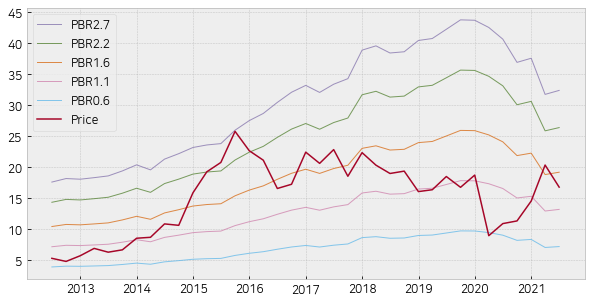

In [ ]:
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS')

In [ ]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 212.25%
Accumulated return: 212.25%
Investment period: 1.0yrs
Sharpe ratio: 3.96
MDD: -0.17%


In [ ]:
signal['2020Q3']

['PAGP',
 'LXU',
 'HNRG',
 'REI',
 'CRESY',
 'GNW',
 'AR',
 'NBR',
 'PEI',
 'BHF',
 'FET',
 'CDR',
 'CPE',
 'APTS',
 'CIG',
 'GLOP',
 'WPG',
 'SND',
 'DAC',
 'YPF',
 'AWX',
 'SALM',
 'DBRG',
 'IRCP',
 'QD',
 'NTZ',
 'NR',
 'GASS',
 'KEP',
 'BTU']

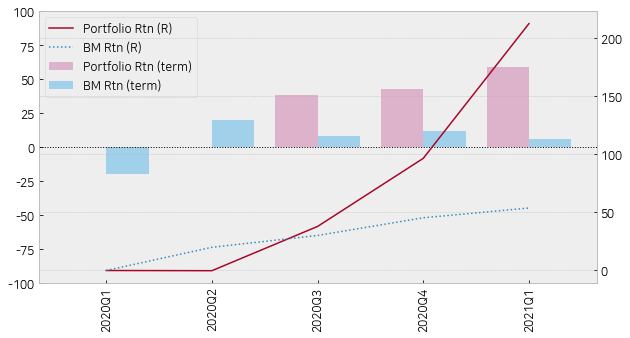

In [ ]:
fs.draw_return(df)

In [ ]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 307.82%
Accumulated return: 307.82%
Investment period: 1.0yrs
Sharpe ratio: 4.53
MDD: 0.00%


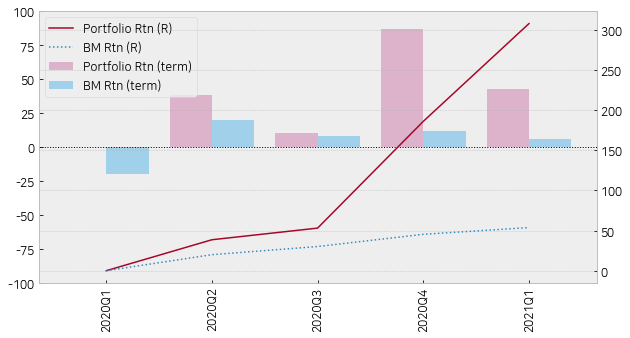

In [ ]:
fs.draw_return(df)

In [ ]:
# 5.4 PSR

In [ ]:
df = fs.fn_single(otp='OTP', symbol='WMT', window='T')

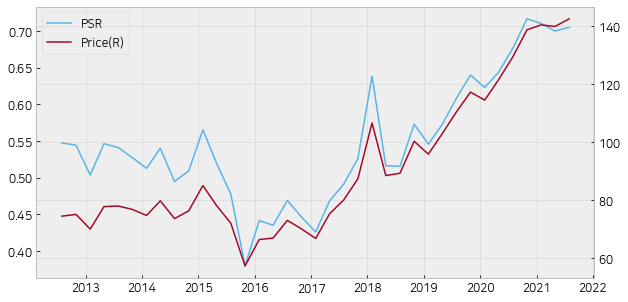

In [ ]:
df['SPS'] = df['Revenue'] / df['Shares']
df['PSR'] = df['Price'] / df['SPS']
fs.draw_chart(df, left='PSR', right='Price')

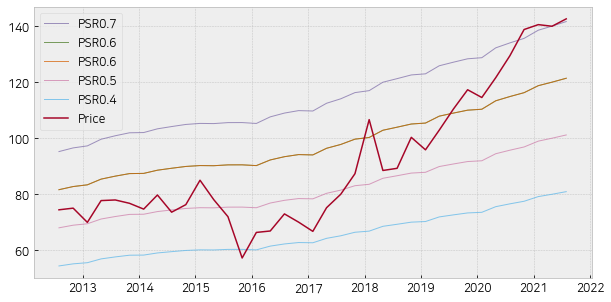

In [ ]:
fs.draw_price_multiple_band(df, multiple='PSR', acct='SPS')

In [ ]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 235.36%
Accumulated return: 235.36%
Investment period: 1.0yrs
Sharpe ratio: 4.98
MDD: 0.00%


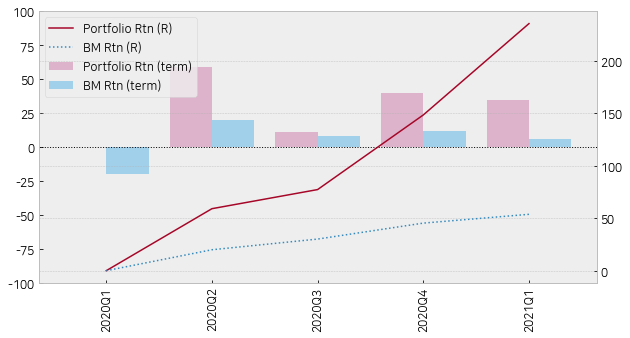

In [ ]:
fs.draw_return(df)

In [ ]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 28.17%
Accumulated return: 1098.66%
Investment period: 10.0yrs
Sharpe ratio: 3.28
MDD: -34.43%


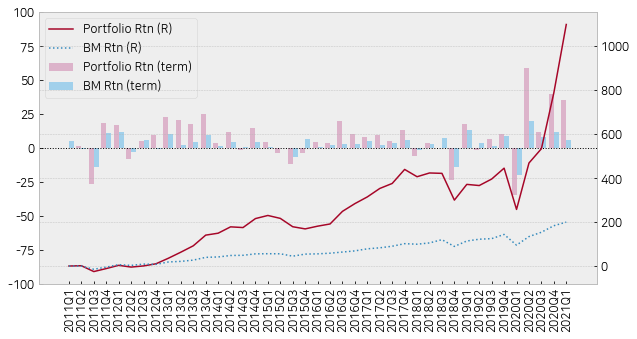

In [ ]:
fs.draw_return(df)

In [ ]:
# 5.5 PCR

In [99]:
otp = '16617468051099710310'

In [8]:
df = fs.fn_single(otp=otp, symbol='MCD', window='T')

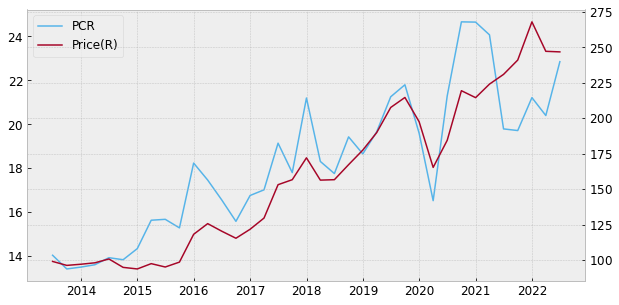

In [9]:
df['OCF'] = df['Net Income'] + df['Depreciation']
df['CFPS'] = df['OCF'] / df['Shares']
df['PCR'] = df['Price'] / df['CFPS']
fs.draw_chart(df, left='PCR', right='Price')

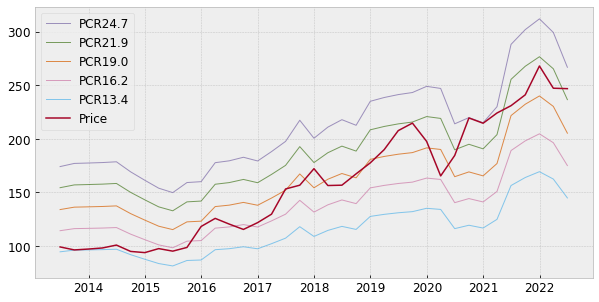

In [10]:
fs.draw_price_multiple_band(df, multiple='PCR', acct='CFPS')

In [13]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2022Q3')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)
s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 16.72%
Accumulated return: 369.97%
Investment period: 10.0yrs
Sharpe ratio: 0.86
MDD: -53.13%


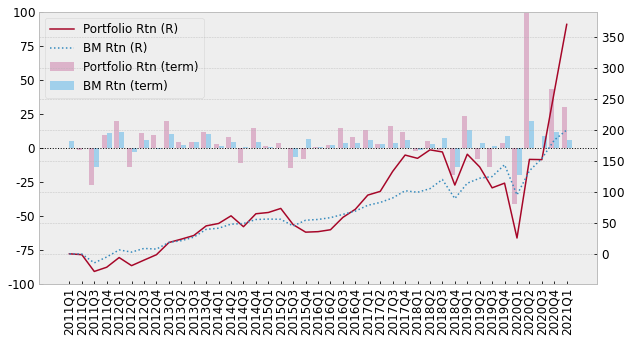

In [15]:
fs.draw_return(df)

In [16]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=10, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 25.82%
Accumulated return: 895.78%
Investment period: 10.0yrs
Sharpe ratio: 1.72
MDD: -44.38%


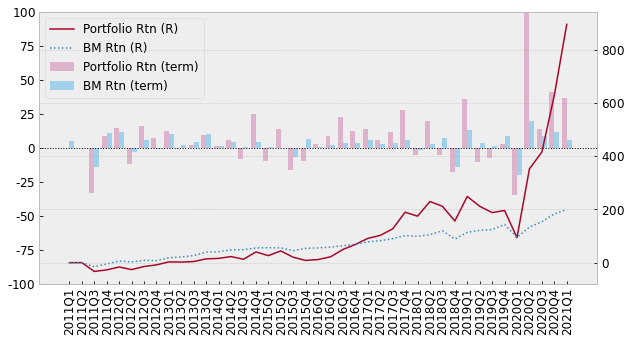

In [17]:
fs.draw_return(df)

In [18]:
# PER, PBR

In [19]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.12%
Accumulated return: 81.27%
Investment period: 10.0yrs
Sharpe ratio: 0.29
MDD: -56.60%


In [20]:
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 38.12%
Accumulated return: 2433.16%
Investment period: 10.0yrs
Sharpe ratio: 4.70
MDD: -35.74%


In [23]:
data.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume', 'PER', 'PBR'],
      dtype='object')

In [ ]:
# 5.6 Combine signal

In [31]:
t = '2020Q3'
data = fs.fn_consolidated(otp=otp, term=t, vol=0)
data['PER'] = data['Price_M3'] / data['EPS']
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity']/data['Shares'])
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=30, asc=True)
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=30, asc=True)

2020Q3...OK


In [32]:
print(s1)

        PER
symbol     
VHC    1.25
UIS    1.35
JOB    1.54
MX     1.58
SND    1.58
VTOL   1.61
TNK    1.66
GTX    1.74
LIVE   1.92
BMA    1.94
LODE   1.96
CTO    2.13
FRO    2.25
TROX   2.27
BXRX   2.32
DHT    2.32
BIG    2.33
DX     2.35
GGAL   2.36
TPHS   2.36
NRG    2.38
FVE    2.39
ALR    2.39
DXYN   2.55
BBAR   2.59
CNNE   2.79
HAPP   2.87
AEL    2.93
SNFCA  2.99
SUPV   3.16


In [33]:
print(s2)

        PBR
symbol     
REI    0.10
ACOR   0.10
TNP    0.11
LTRPA  0.12
BORR   0.12
RIG    0.12
GNW    0.13
SISI   0.14
GLOP   0.14
GURE   0.15
SMHI   0.16
CDEV   0.16
FET    0.16
GASS   0.16
IRS    0.17
BBGI   0.17
NMM    0.17
TCOM   0.17
BHF    0.18
WPG    0.19
NGL    0.19
BBU    0.19
XYF    0.19
SFUN   0.20
OBE    0.20
APWC   0.20
CRESY  0.21
SALM   0.21
QD     0.21
XIN    0.21


In [34]:
print(fs.combine_signal(s1, s2, how='and'))

Empty DataFrame
Columns: [PER, PBR]
Index: []


In [35]:
print(fs.combine_signal(s1, s2, how='or'))

        PER  PBR
symbol          
ACOR    NaN 0.10
AEL    2.93  NaN
ALR    2.39  NaN
APWC    NaN 0.20
BBAR   2.59  NaN
BBGI    NaN 0.17
BBU     NaN 0.19
BHF     NaN 0.18
BIG    2.33  NaN
BMA    1.94  NaN
BORR    NaN 0.12
BXRX   2.32  NaN
CDEV    NaN 0.16
CNNE   2.79  NaN
CRESY   NaN 0.21
CTO    2.13  NaN
DHT    2.32  NaN
DX     2.35  NaN
DXYN   2.55  NaN
FET     NaN 0.16
FRO    2.25  NaN
FVE    2.39  NaN
GASS    NaN 0.16
GGAL   2.36  NaN
GLOP    NaN 0.14
GNW     NaN 0.13
GTX    1.74  NaN
GURE    NaN 0.15
HAPP   2.87  NaN
IRS     NaN 0.17
JOB    1.54  NaN
LIVE   1.92  NaN
LODE   1.96  NaN
LTRPA   NaN 0.12
MX     1.58  NaN
NGL     NaN 0.19
NMM     NaN 0.17
NRG    2.38  NaN
OBE     NaN 0.20
QD      NaN 0.21
REI     NaN 0.10
RIG     NaN 0.12
SALM    NaN 0.21
SFUN    NaN 0.20
SISI    NaN 0.14
SMHI    NaN 0.16
SND    1.58  NaN
SNFCA  2.99  NaN
SUPV   3.16  NaN
TCOM    NaN 0.17
TNK    1.66  NaN
TNP     NaN 0.11
TPHS   2.36  NaN
TROX   2.27  NaN
UIS    1.35  NaN
VHC    1.25  NaN
VTOL   1.61  N

In [36]:
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True)

In [37]:
print(s1)

        PER  Score
symbol            
VHC    1.25  97.20
UIS    1.35  96.10
JOB    1.54  94.00
MX     1.58  93.60
SND    1.58  93.60
...     ...    ...
CIVI   9.91   1.00
LCNB   9.93   0.80
RDN    9.93   0.80
FISI   9.96   0.50
EBTC   9.98   0.20

[294 rows x 2 columns]


In [38]:
print(s2)

        PBR  Score
symbol            
REI    0.10  99.60
ACOR   0.10  99.40
TNP    0.11  99.40
LTRPA  0.12  98.30
BORR   0.12  97.80
...     ...    ...
STCN   1.00   0.30
SITC   1.00   0.30
FCF    1.00   0.20
TEVA   1.00   0.20
CRS    1.00   0.10

[811 rows x 2 columns]


In [39]:
print(fs.combine_score(s1, s2, n=10))

        Score  Score_   Sum
symbol                     
SND     46.80   42.40 89.20
TNK     46.35   37.65 84.00
STNG    36.90   39.60 76.50
PVL     37.10   37.20 74.30
LIVE    44.90   28.60 73.50
AEL     39.25   32.50 71.75
JOB     47.00   24.70 71.70
TNP     20.70   49.70 70.40
BMA     44.75   25.40 70.15
TRMD    36.80   33.20 70.00


In [40]:
s1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True)

In [41]:
print(s1)

        PER  Score
symbol            
VHC    1.25 100.00
UIS    1.35  99.70
JOB    1.54  99.30
MX     1.58  99.00
SND    1.58  98.60
...     ...    ...
CIVI   9.91   1.70
LCNB   9.93   1.40
RDN    9.93   1.00
FISI   9.96   0.70
EBTC   9.98   0.30

[294 rows x 2 columns]


In [42]:
print(s2)

        PBR  Score
symbol            
REI    0.10 100.00
ACOR   0.10  99.90
TNP    0.11  99.80
LTRPA  0.12  99.60
BORR   0.12  99.50
...     ...    ...
STCN   1.00   0.60
SITC   1.00   0.50
FCF    1.00   0.40
TEVA   1.00   0.20
CRS    1.00   0.10

[811 rows x 2 columns]


In [43]:
print(fs.combine_score(s1, s2, n=10))

        Score  Score_   Sum
symbol                     
SND     49.30   47.65 96.95
TNK     49.00   45.60 94.60
STNG    44.40   46.50 90.90
PVL     44.55   45.40 89.95
LIVE    48.65   40.30 88.95
AEL     45.40   42.60 88.00
TRMD    44.20   43.30 87.50
JOB     49.65   37.65 87.30
BMA     48.45   38.15 86.60
INSW    43.35   42.55 85.90


In [ ]:
# 5.7 가치투자 4대장 콤보

In [ ]:
# pip install finterstellar

In [ ]:
import finterstellar as fs

In [44]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
terms

Index(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
       '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [46]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)   

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [61]:
print(data['2020Q4'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q4  5,339.00  2,502.00      2,837.00 1,496.00            846.00   
AA      2020Q4  9,319.00  8,134.00      1,185.00   206.00            327.00   
AADI    2020Q4     15.00      0.05         14.98     8.76             -6.36   
AAIC    2020Q4     53.51      0.00         46.01    12.62             10.48   
AAL     2020Q4 17,338.00 22,961.00     -5,623.00   666.00        -10,421.00   
...        ...       ...       ...           ...      ...               ...   
ZUO     2020Q4    296.53    132.78        163.74   166.79            -79.67   
ZVO     2020Q4    397.12    117.22        279.90   199.57            -61.90   
ZWS     2020Q4  1,502.40    926.97        575.43   327.27            226.40   
ZYME    2020Q4     38.95    171.20       -132.25    55.22           -187.47   
ZYXI    2020Q4     80.12     17.42         62.70    

In [62]:
for t in terms:    
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )

In [63]:
print(data['2020Q4'].sort_values(by='Market Cap', ascending=False).head())

          term    Revenue       COGS  Gross Profit      SG&A  \
symbol                                                         
GOOGL   2020Q4 182,527.00  84,732.00     97,795.00 28,998.00   
AAPL    2020Q4 294,239.00 179,823.00    114,416.00 20,350.00   
MSFT    2020Q4 153,284.00  48,510.00    104,774.00 24,693.00   
GOOG    2020Q4 182,528.00  84,732.00     97,796.00 28,998.00   
AMX     2020Q4  48,024.40  24,375.90     23,648.50 10,010.70   

        Operating Income  Net Income   EPS    EBITDA      EBIT  ...  \
symbol                                                          ...   
GOOGL          41,224.00   40,269.00  2.96 54,921.00 41,224.00  ...   
AAPL           74,253.00   63,930.00  3.72 85,508.00 74,253.00  ...   
MSFT           60,155.00   51,310.00  6.78 72,183.00 60,155.00  ...   
GOOG           41,224.00   40,269.00 59.02 54,922.00 41,224.00  ...   
AMX             8,289.00    2,106.21  0.10  9,999.55  8,289.00  ...   

                                        name         

In [64]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
for t in terms:  
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)

In [67]:
s6 = {}
for t in terms:      
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])

In [70]:
s = {}
signal = {}
for t in terms:      
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)

In [71]:
print(signal['2020Q3'])

['JOB', 'TNK', 'TNP', 'DXYN', 'SND', 'VRS', 'STNG', 'OSG', 'ARC', 'ASC', 'DLNG', 'HAPP', 'MESA', 'OPY', 'VIA', 'YRD', 'QD', 'AP', 'ELVT', 'CNSL', 'COWN', 'INSW', 'FINV', 'ORN', 'BGFV', 'BZH', 'NAT', 'VTOL', 'CUBI', 'CLW', 'ASUR', 'RYAM', 'CIVI', 'SGU', 'ENVA', 'LEJU', 'VHC', 'MX', 'HRTG', 'LPG', 'AMRX', 'KOP', 'RTLR', 'DX', 'STRL', 'HAFC', 'SCPL', 'CO', 'QIWI', 'HLX']


In [73]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 11.43%
Accumulated return: 195.28%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -49.31%


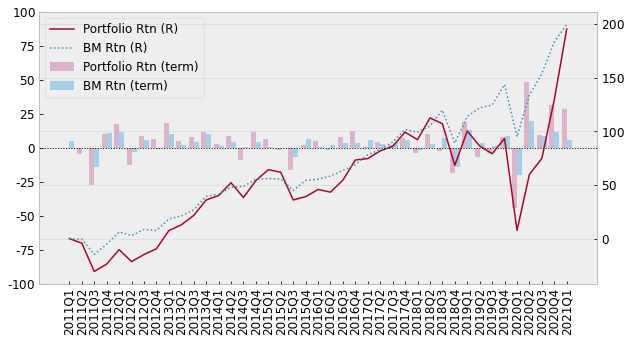

In [74]:
fs.draw_return(df)

In [75]:
# 4대장 + 소형주
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 11.43%
Accumulated return: 195.28%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -49.31%


In [76]:
# 4대장 + 대형주
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=False)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.32%
Accumulated return: 68.04%
Investment period: 10.0yrs
Sharpe ratio: 0.28
MDD: -46.60%


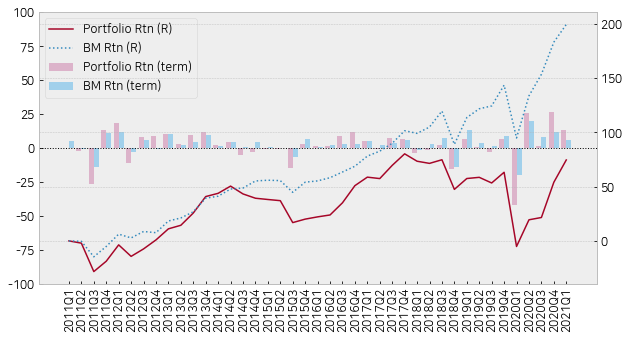

In [ ]:
fs.draw_return(df)

In [ ]:
# 5.8 EV/EBITDA, EV/Sales

In [81]:
df = fs.fn_single(otp=otp, symbol='NKE', window='T')

In [82]:
df['Market Cap'] = df['Price'] * df['Shares']    
df['EV'] = df['Market Cap'] + df['Long Term Debt'] + df['Current Debt'] - df['Cash & Equivalents']

In [83]:
df['EV/EBITDA'] = df['EV'] / df['EBITDA']

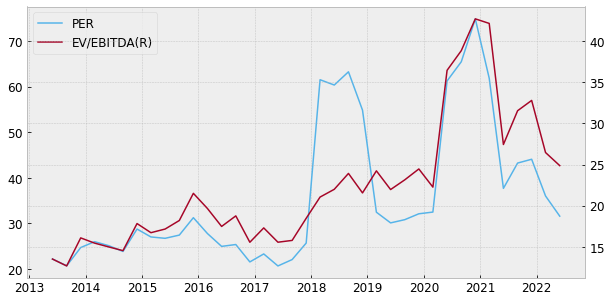

In [84]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='EV/EBITDA')

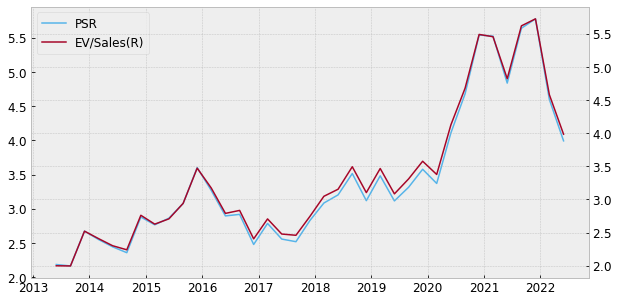

In [85]:
df['EV/Sales'] = df['EV'] / df['Revenue']
df['PSR'] = df['Price'] / (df['Revenue']/df['Shares'])
fs.draw_chart(df, left='PSR', right='EV/Sales')

In [86]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)

In [87]:
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']

In [88]:
for t in terms:
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')

In [89]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)

In [90]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  

CAGR: 10.65%
Accumulated return: 175.25%
Investment period: 10.0yrs
Sharpe ratio: 0.58
MDD: -48.49%


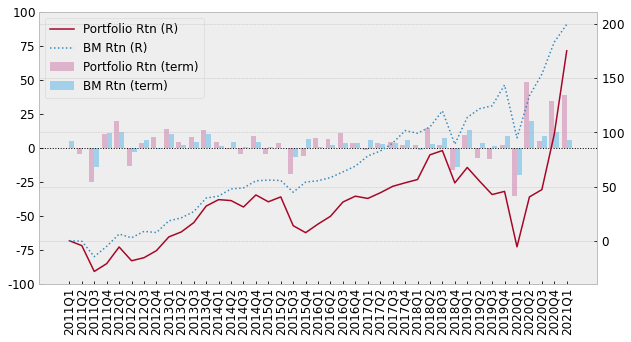

In [91]:
fs.draw_return(df)

In [92]:
# EV/EBITDA
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  

CAGR: 10.65%
Accumulated return: 175.25%
Investment period: 10.0yrs
Sharpe ratio: 0.58
MDD: -48.49%


CAGR: 25.85%
Accumulated return: 898.65%
Investment period: 10.0yrs
Sharpe ratio: 2.87
MDD: -26.07%


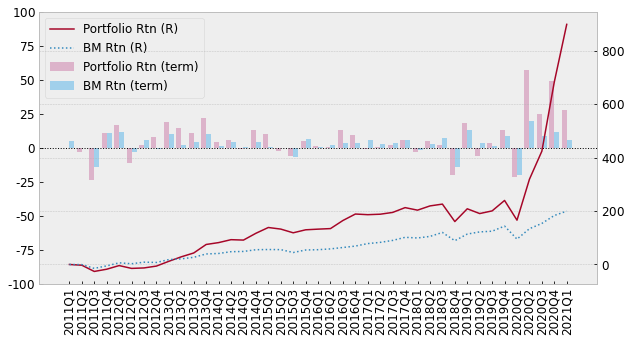

In [93]:
# EV/Sales
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['Revenue']<=0), 'EV/Sales'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  
fs.draw_return(df)

In [ ]:
#5.9 NCAV

In [102]:
df = fs.fn_single(otp=otp, symbol='AAPL', window='T')

In [105]:
df['NCAV'] = df['Current Assets'] - df['Total Liabilities']

In [104]:
df['Market Cap'] = df['Price'] * df['Shares'] 

In [106]:
df['Safety Margin'] = df['NCAV'] - df['Market Cap']*1.5

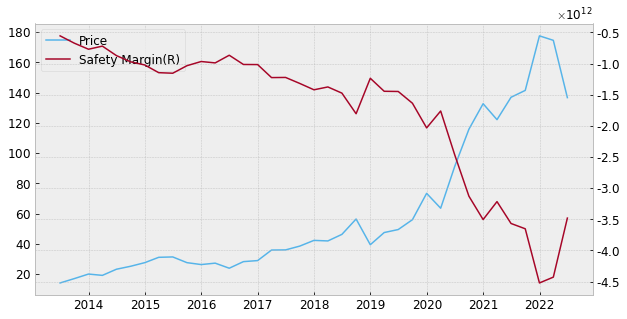

In [107]:
fs.draw_chart(df, left='Price', right='Safety Margin')

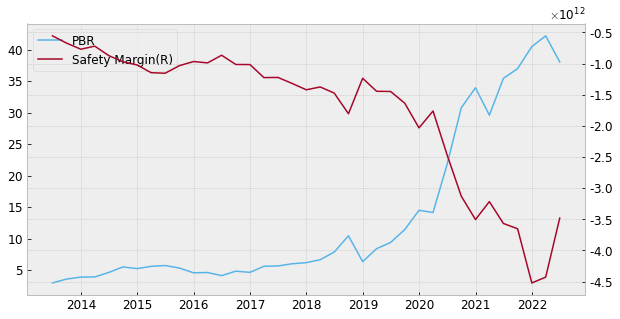

In [108]:
df['PBR'] = df['Price'] / (df['Shareholders Equity']/df['Shares'])
fs.draw_chart(df, left='PBR', right='Safety Margin')

In [110]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t, vol=10000)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [111]:
for t in terms:   
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5

In [112]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

In [113]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 27.50%
Accumulated return: 1037.94%
Investment period: 10.0yrs
Sharpe ratio: 3.32
MDD: -11.85%


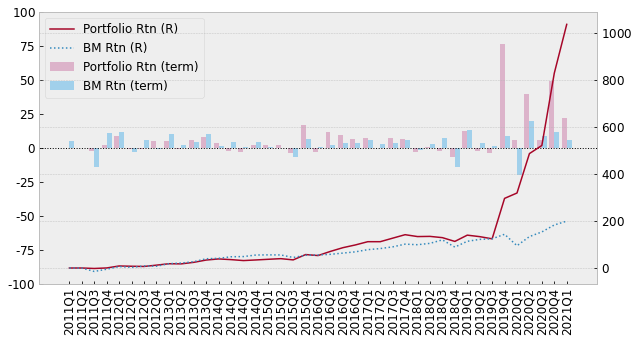

In [114]:
fs.draw_return(df)

In [115]:
for k, v in signal.items():
    print(k, len(v))

2010Q4 0
2011Q1 3
2011Q2 15
2011Q3 11
2011Q4 8
2012Q1 15
2012Q2 11
2012Q3 14
2012Q4 10
2013Q1 10
2013Q2 9
2013Q3 6
2013Q4 7
2014Q1 8
2014Q2 8
2014Q3 7
2014Q4 7
2015Q1 8
2015Q2 10
2015Q3 12
2015Q4 9
2016Q1 15
2016Q2 10
2016Q3 16
2016Q4 7
2017Q1 14
2017Q2 14
2017Q3 9
2017Q4 9
2018Q1 10
2018Q2 12
2018Q3 18
2018Q4 19
2019Q1 18
2019Q2 23
2019Q3 24
2019Q4 30
2020Q1 30
2020Q2 30
2020Q3 22
2020Q4 16


In [116]:
signal['2020Q3']

['QD',
 'IBKR',
 'XYF',
 'CGA',
 'APWC',
 'ACR',
 'MITT',
 'TRTX',
 'HALL',
 'YRD',
 'SECO',
 'SISI',
 'NVFY',
 'RCEL',
 'GURE',
 'VIRX',
 'FENG',
 'GOVX',
 'RELL',
 'LMFA',
 'HAPP',
 'MSN']

CAGR: 27.50%
Accumulated return: 1037.94%
Investment period: 10.0yrs
Sharpe ratio: 3.32
MDD: -11.85%


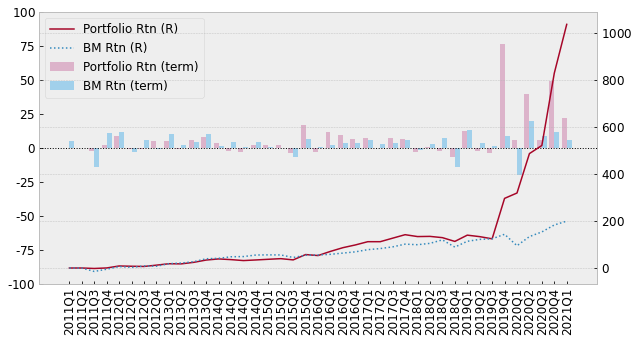

In [117]:
# Safety Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms: 
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# 5.10 PEG

In [120]:
df = fs.fn_single(otp=otp, symbol='AAPL', window='T')

In [121]:
df['PER'] = df['Price'] / df['EPS']

In [122]:
df['EPS Growth'] = ( df['EPS'] - df['EPS'].shift(4) ) / abs(df['EPS'].shift(4)) * 100
df['PEG'] = ( df['Price'] / df['EPS'] ) / df['EPS Growth']

In [123]:
print(df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10))

            EPS  EPS Growth   PER  PEG
2020-03-31 3.22        7.34 19.76 2.69
2020-06-30 3.32       12.26 27.47 2.24
2020-09-30 3.30       10.47 35.12 3.35
2020-12-31 3.74       17.16 35.50 2.07
2021-03-31 4.50       39.94 27.13 0.68
2021-06-30 5.15       55.12 26.59 0.48
2021-09-30 5.65       71.34 25.04 0.35
2021-12-31 6.05       61.87 29.35 0.47
2022-03-31 6.16       36.81 28.35 0.77
2022-06-30 6.06       17.67 22.56 1.28


In [125]:
df = fs.fn_single(otp=otp, symbol='AMZN', window='T')
df['PER'] = df['Price'] / df['EPS']
df['EPS Growth'] = ( df['EPS'] - df['EPS'].shift(4) ) / abs(df['EPS'].shift(4)) * 100
df['PEG'] = df['PER'] / df['EPS Growth']
print(df[['EPS','EPS Growth','PER', 'PEG']].tail(10))

            EPS  EPS Growth    PER   PEG
2020-03-31 1.06      -13.20  91.54 -6.93
2020-06-30 1.32        7.42 104.18 14.03
2020-09-30 1.74       50.98  90.48  1.78
2020-12-31 2.13       81.66  76.46  0.94
2021-03-31 2.68      151.64  57.72  0.38
2021-06-30 2.92      120.17  59.01  0.49
2021-09-30 2.59       49.05  63.33  1.29
2021-12-31 3.26       53.26  51.07  0.96
2022-03-31 2.08      -22.39  78.37 -3.50
2022-06-30 1.12      -61.58  94.83 -1.54


In [127]:
# PEG
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t) 
s = {}
signal = {}
for t in terms:
    t_4 = fs.quarters_before(terms, t, 4)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['EPS Growth'] = ( data[t]['EPS'] - data[t_4]['EPS'] ) / abs(data[t_4]['EPS'])
    data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth']
    data[t].loc[(data[t]['PER']<=0) | (data[t]['EPS Growth']<=0), 'PEG'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 4.33%
Accumulated return: 52.84%
Investment period: 10.0yrs
Sharpe ratio: 0.25
MDD: -39.83%


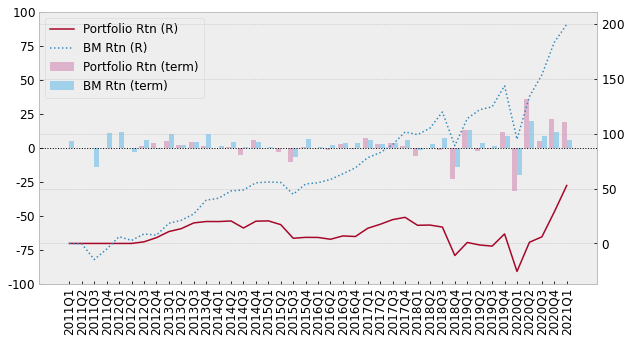

In [128]:
fs.draw_return(df)